<a href="https://colab.research.google.com/github/MayaLegersky/Group1Project3/blob/main/Project_3_planetary_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii

##All calculations, code done by Maya for this project

Part 1: Find equivalent width of Sodium doublet line

In [4]:
#read in spectrum file
from google.colab import drive
drive.mount('/content/drive')
spec = astropy.io.ascii.read('drive/My Drive/solar_spectrum.txt')
spec1 = np.loadtxt('drive/My Drive/solar_spectrum.txt')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0, 0.5, 'Flux')

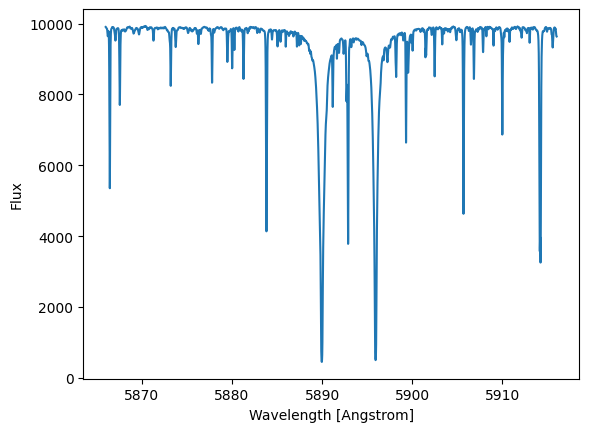

In [5]:
# plot solar spectrum directly from solar data file
wl = spec1[:,0]
fl = spec1[:,1]
plt.plot(wl, fl)
plt.xlabel("Wavelength [Angstrom]")
plt.ylabel("Flux")

Text(0, 0.5, 'Normalized Flux')

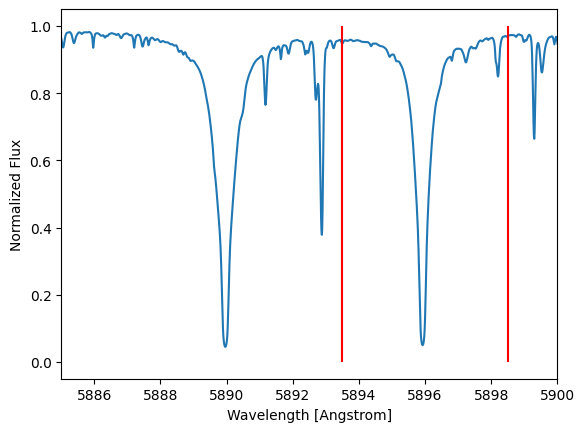

In [6]:
# plot normalized flux for ease of calculation- got from the project notebook
plt.plot(spec["col1"], spec["col2"] / 1e4)
# vlines define rectangle for finding equivalent width- I will do the one on the right since the example did the other.
plt.vlines(5893.5, 0, 1, color="red")
plt.vlines(5898.5, 0, 1, color="red")
plt.xlim(5885, 5900)
plt.xlabel("Wavelength [Angstrom]")
plt.ylabel("Normalized Flux")

In [7]:
#calculate equivalent width
ind = np.where((spec["col1"] < 5898.5) & (spec["col1"] > 5893.5)) #plug in vline values that I estimated, these are the approximate bounds of the sodium line to calculate in
inc = np.median(np.diff(spec["col1"][ind]))
ew = np.sum(1e4 - spec["col2"][ind]) * inc / 1e4
print("equivalent width (ew) = ", ew, " Angstrom")

equivalent width (ew) =  0.6987110000152513  Angstrom


Part 2: Find number density of Na atoms in ground state, first we have to find a curve of growth plot based off of the calculated equivalent width


Here is the curve of growth plot (CITE THIS IN PAPER!)
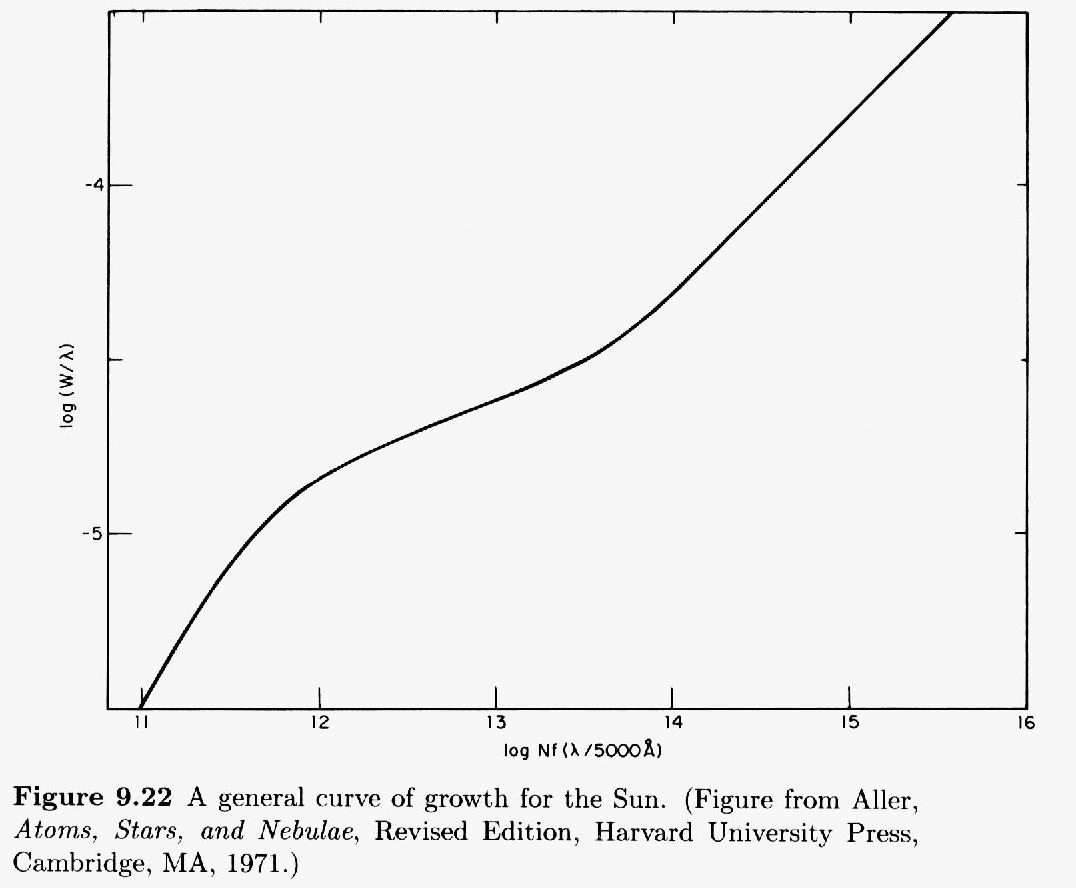

In [8]:
np.log10(0.699 / 5896.0) #find logarithmic scale here for ew/ the wavelength the doublet line occurs at -- when compared to the value for the other doublet line calculated in the example, it is almost the same value

np.float64(-3.9260802991053136)

Using log(w/lambda)~-3.9, on the graph, log Nf(lambda/5000 angstroms) ~ 14.7
solve for N:

In [9]:
N = 10**14.7 / 0.65 / (5896 / 5000)
print("The number density of soium in the ground state is",N)

The number density of soium in the ground state is 653881684619652.8


3) Find ratio of Na atoms in ground state to excited state using Boltzmann eq

COPIED FROM EXAMPLE NOTEBOOK:
## $\frac{N_2}{N_1} = \frac{g_2}{g_1}\exp\left({-\frac{E_2 - E_1}{kT}}\right)$, where subscripts 1 and 2 refer to 3s and 3p states, $N$ is number density, $g$ is the number of separate, individual states that are degenerate in energy, $E$ is energy at the state, $k$ is Boltzmann constant, and $T$ is temperature.


In [14]:
# for T, we will use the average temperature of the sun's photosphere, ~5800 K (https://lco.global/spacebook/solar-system/sun/)
T = 5800
K_B= 1.380649*10**-23 #Boltzmann constant in J/K
EDiff = 3.37 * 10**-19 #E2-E1, in Joules, calculated between 3p and 3s levels of Sodium
degenstates = 3 #ratio of 3p (6) to 3s (2) states

a=T*K_B
b=EDiff/a
boltzmannRatio = degenstates*np.exp(-b)
print("The ratio of sodium atoms in the ground state to the excited state is", boltzmannRatio)

The ratio of sodium atoms in the ground state to the excited state is 0.044609727482218045


4) Estimate the ratio of neutral sodium atoms to ionized sodium atoms using the Saha equation.

FROM EXAMPLE NOTEBOOK:

## $\frac{Na_{II}}{Na_{I}} = \frac{2kT}{P_e} \frac{Z_{II}}{Z_I} \left(\frac{2\pi m_e kT}{h^2}\right)^{3/2}\exp{\left(-\frac{\chi}{kT}\right)}$, where $m_e$ is electron mass, partition function $Z_I = 2.4$ and  $Z_{II} = 1.0$, electron pressure $P_e = n_e kT = 1.0 N\cdot m^{-2}$, and the ionization energy $\chi = 5.1$ eV. Note that the values given are for the sodium line only. Other lines have different values.

In [15]:
v1 = 2*a/1*(1/2.4) #start plugging in values
me = 9.12 * 10**-31 # electron mass in kg
h = 6.626 * 10**-34 # planck's constant
v2 = 2*np.pi*me*a/(h**2)
x= 8.17*10**-19 #convert 5.1 eV to joules
sahaRatio =  v1 * v2**(3/2) * np.exp(-x/a)
print("The ration of neutral to ionized sodium atoms is", sahaRatio)

The ration of neutral to ionized sodium atoms is 2643.459395396313


5) Compute column density based off of the 3 calculated values

FROM ASSIGNMENT NOTEBOOK:

Total number of sodium atoms:
$N_{1} \times (1+\frac{N_2}{N_1}) \times (1+\frac{Na_{II}}{Na_{I}}$). $N_1$ is measured from the curve of growth.

In [27]:
totalAtoms = N * (1+boltzmannRatio) * (1+sahaRatio)

#realized I was overcomplicating things, LOL
# Rsun = 695700 # in km, data from https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html
# Rphotosphere = Rsun + 402.3 # photosphere is from surface - ~402 km away (https://www.nasa.gov/image-article/layers-of-sun/)
# surfaceArea = np.pi*(Rphotosphere**2-Rsun**2) #just of photosphere
columnDensity = totalAtoms
print("The column density of the sun's sodium in the photosphere bases is", columnDensity)

The column density of the sun's sodium in the photosphere bases is 1.8063010797487365e+18


6) The column density of hydrogen atoms is about  6.6×10^23 ; what is the abundance of sodium relative to hydrogen?

From the assignment notebook:

## In astronomers' term, we set log relative abundance for Hydrogen at 12. Abundances of other elements are expressed as: $12 + log_{10}(N_{element}/N_{H})$, where N is in mole or number density. For example, in solar atmosphere, $N_{He}/N_{H}\sim1/10$ and therefore log abundance for He is $\sim$11.

In [30]:
#NOTE: these are just abundances in the photosphere

#express in logarithmic terms for astronomy purposes
H_ColumnDensity = 6.6*10**23

#once again overcomplicating whoops...
# H_tot = H_ColumnDensity * surfaceArea
# N_H = H_ColumnDensity / (6.023*10**23) #find molar density of hydrogen from column density
# N_NA = columnDensity / (6.023*10**23)
# print(N_H, N_NA)
frac= columnDensity/H_ColumnDensity
AstroAbundance =  12 + np.log10(frac)
print("The abundance of sodium relative to hydrogen in astronomer's terms is", AstroAbundance)

#express as mass fraction in physics terms
# mNA = columnDensity * 22.99 # in u, mass units don't matter too much since we're taking a ratio
# mH =  N_H # hydrogen mass is ~1 u
massFrac = (columnDensity/H_ColumnDensity)

print("The abundance of sodium relative to hydrogen in physicists terms is", massFrac)

The abundance of sodium relative to hydrogen in astronomer's terms is 6.437246205992304
The abundance of sodium relative to hydrogen in physicists terms is 2.736819817801116e-06
